In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import importlib

import my_utils.pixel as pixel
importlib.reload(pixel) # get changes in my_utils.pixel
print(os.getcwd())

/home/lukas/Documents/ETH/MASTER_THESIS/code


### Load Data:

In [2]:
WW = True  # only consider 'Winter Wheat' otherwise consider Cereals

if WW:
    path_cov = os.path.join("data/yieldmapping_data", "WW_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "WW_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "WW_yield_tot.csv")
else:
    path_cov = os.path.join("data/yieldmapping_data",
                            "Cereals_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "Cereals_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "Cereals_yield_tot.csv")

d_cov = pd.read_csv(path_cov)
d_met = pd.read_csv(path_met)
d_yie = pd.read_csv(path_yie)

In [ ]:
from sklearn.model_selection import KFold
import random 

np.random.seed(1)
self = pixel.Pixel(d_cov, d_met, d_yie)

def _init_cv_interpolate(self):
    if not hasattr(self, "step_interpolate"):
        self._init_step_interpolate()
    self.cv_interpolate = pd.DataFrame(
        {"date": self.step_interpolatie.date, "date_unix": self.step_interpolatie.date_unix, "das": self.step_interpolate.das})

def cv_interpolation(self, methodname, y=None, k=5, n_min=5, method='get_smoothing_spline', method_args={}):
    """
    teile irgendwie crossvalidation ein,
    gewünscht: k is die anzahl der durchgänge
    n_min ist die mindeste geforderte anzahl an punkten zum training

    result:
    DataFrame where each column corresponds to the error of one test-fold

    from now on apply furtcher functions which calculate statistics
    like RMSE, Med, MAD, QN, ....
    """
    if k is None:
        k = self.cov_n
    if y is None:
        y = self.get_ndvi()   
    k = min(self.cov_n, k)
    kf = KFold(k, shuffle=True)
    x = self.cov.das
    residuals = pd.DataFrame({"das":x, ("cv_"+methodname+"_truth"):y})
    if not hasattr(self, "cv_interpolate"):
        self._init_cv_interpolate()
    for i, train, test in enumerate(self.cv_interpolation):
        ind_keep_bool = [i in train for i in range(self.cov_n)]
        name = "cv_"+methodname+"_"+str(i)
        args = {**method_args, 'ind_keep':ind_keep_bool, 'name':"cv_"+name+"_"+str(i)}
        obj = getattr(self, method)(**args)
        #locate ind
        ind_test_bool = [i in test for i in range(self.cov_n)]
        # ind_test_bool_for_step_interpolate
        ind_test = [i in x[ind_test_bool] for i in self.step_interpolate.das]
        res = y[test] - obj[ind_test]
        res = pd.DataFrame(obj, name=["res_"+methodname+"_"+str(i)])
    return res


        
    return kf.split(y)

interpolation_cv(self, method_args={'name':"WW"})
self.step_interpolate


### smoothing splines for NDVI:

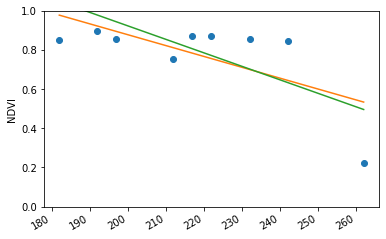

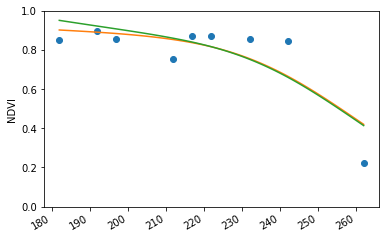

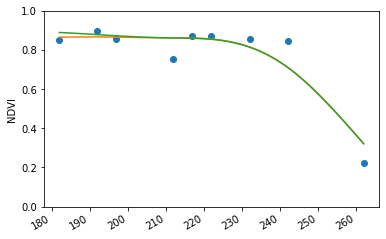

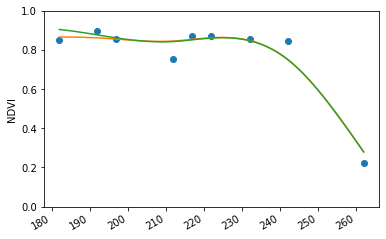

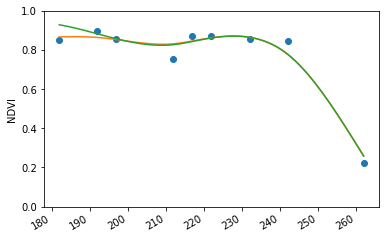

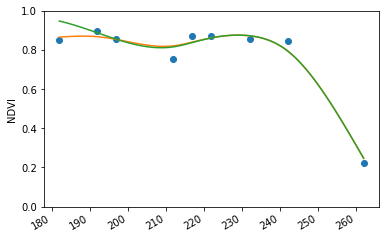

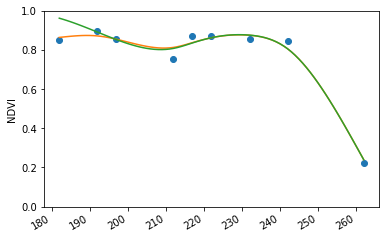

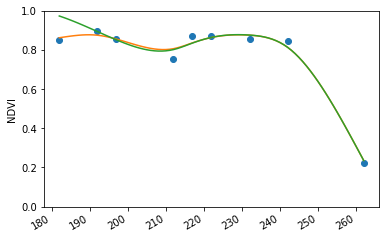

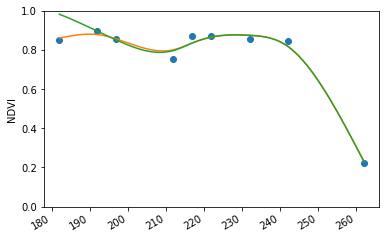

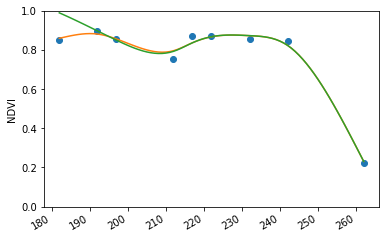

In [ ]:
importlib.reload(pixel)  # get changes in my_utils.pixel
# np.random.seed(1)
smooth = 0 #1e-11/(28*24*3600)

temp = pixel.Pixel(d_cov, d_met, d_yie)
temp.get_ndvi()
for smooth in np.linspace(0,0.2,num=10):
    temp.plot_ndvi()
    smooth=smooth**2.5
    temp.get_smoothing_spline(name="all"+str(smooth), smooth=smooth)
    temp.get_smoothing_spline(name="filter"+str(smooth), smooth=smooth,
                             ind_keep=[False, *[True]*(temp.cov_n-1)])
    temp.plot_step_interpolate(which="all"+str(smooth))
    temp.plot_step_interpolate(which="filter"+str(smooth))
    plt.show()

# print(temp)

In [ ]:
import scipy.interpolate as interpolate
self = pixel.Pixel(d_cov, d_met, d_yie)
self.get_b_spline()
self.plot_ndvi()
self.plot_step_interpolate("BSpline")

# TO DO 
- beautiful plot (colors, legend, title)
- advanced plotting (support for lists)